In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle, json
import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  




In [2]:
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)



# Plot setup

In [3]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.5#(np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':14,
          'axes.labelsize': 10,
#           'text.fontsize': 10,
          'legend.fontsize': 6,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

set_b = 0.22 # set bottom
set_l = 0.1 # set left
set_r = 0.925 # set right
set_hs = 0.2 # set horizontal space
set_vs = 0.25 # set vertical space

set_ms = 0.0 # set marker size
set_lw = 2.5 # set line width
set_alpha = 0.8

n_std = 2

## set colors
cmap = 'tab10'
cm = plt.get_cmap(cmap)

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# READ ALL THE DATA

dict_data = {corpus_name : dict_data_corpus}

dict_data_corpus = {method_name : (arr_p,arr_acc)}

In [4]:
folder_marker = 'class-cv-svm_20190607'

list_name_method = [
'INFOR',
'TFIDF',
'MANUAL',
'BOTTOM',
'TOP',
'TOP-BOTTOM',
# 'TFIDF_r',
]
# list_indc_tab10 = [0,1,2,3,6,9]
list_colors = [
    plt.get_cmap('tab20c')(0),
    plt.get_cmap('tab20c')(8),
    plt.get_cmap('tab20c')(4),
    plt.get_cmap('tab20b')(11),
    plt.get_cmap('tab20b')(10),
    plt.get_cmap('tab20b')(9),
#     str(0.)
]

list_ls = [
    '-',
    '-',
    '-',
    '-',
    '--',
    '-.',
#     ':'
]

# ## set up data
list_name_corpus = [
        't20NewsGroup_topic_doc_no_short',
        'reuters_filter_10largest_dic',
        'wos_topic_doc_delSci_withstop',
        'multi_lg_portuguese_dw_general_v2',
        'multi_lg_german',
        'multi_lg_chinese_sogou'
        ]
list_name_title = [
    '20 Newsgroups',
    'Reuters',
    'Web of Science',
    'Portuguese',
    'German',
    'Chinese'
    
]

dict_data = {}

i_corpus= 0
for name_corpus in list_name_corpus:
    # name_corpus= 'reuters_filter_10largest_dic'
    dict_data_tmp = {}
    list_arr_acc = []
    list_arr_p = []
    path_read = os.path.join(os.pardir,'data','%s'%(folder_marker))
    for method in list_name_method:
        fname_read = '%s_%s_acc.npz'%(name_corpus,method)
        filename = os.path.join(path_read,fname_read)
        result = np.load(filename)
        arr_p_tmp = result['p']
        arr_acc_tmp = result['acc']
        dict_data_tmp[method] = (arr_p_tmp,arr_acc_tmp)
#         list_arr_acc += [arr_acc_tmp]
#         list_arr_p += [arr_p_tmp]
    dict_data[name_corpus] = dict_data_tmp
        


In [5]:
# dict_data

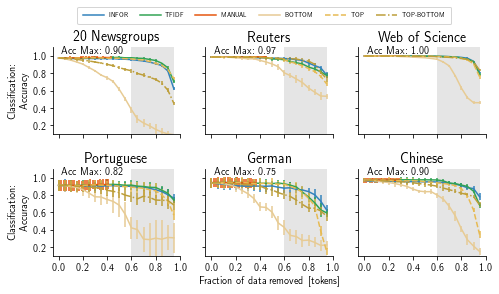

In [6]:
nrows=2
ncols=3

x_lable_list = [0.0,0.2,0.4,0.6,0.8,1.]
y_lable_list = [0.2, 0.4,0.6,0.8,1.]

ylim1,ylim2 = 0.1,1.1
xlim1,xlim2 = -0.05,1.0

x_annot = -0.25
y_annot = 1.1
x_annot2 = -0.1
y_annot2 = 1.1
list_annot = ['A','B','C','D','E','F']

fig = plt.figure(figsize=fig_size)

for i_name_corpus,name_corpus in enumerate(list_name_corpus):
    i_ax = i_name_corpus+1
    ax = fig.add_subplot(nrows,ncols,i_ax)
    


        
    ## plot the data

    dict_data_corpus = dict_data[name_corpus]
    
    ## first iteration to get the maximum
    acc_max = 0.0
    for i_name_method, name_method in enumerate(list_name_method):
        i_plot=i_name_method
        arr_p, arr_acc = dict_data_corpus[name_method]
        acc_max_tmp = np.max(arr_acc)
        if acc_max_tmp > acc_max:
            acc_max = acc_max_tmp
    for i_name_method, name_method in enumerate(list_name_method):
        i_plot=i_name_method
        arr_p, arr_acc = dict_data_corpus[name_method]   
        
        x = arr_p
        z = arr_acc/acc_max
        y = np.mean(z,axis=0)
        yerr=n_std*np.std(z,axis=0)
        c = list_colors[i_name_method]
        ls = list_ls[i_name_method]
        ax.errorbar(x,y,yerr=yerr,label=name_method,c = c,alpha=1.,ls=ls)

    

        
    ax.set_title(list_name_title[i_name_corpus])

    
    ax.set_xticks(x_lable_list)
    ax.set_yticks(y_lable_list)   
    
    if i_ax%ncols==1:
        ax.set_ylabel('Classification: \n Accuracy')
        ax.set_yticklabels(y_lable_list)
#         ax.annotate(r'\textbf{%s}'%(list_annot[i_name_corpus]),xy=(x_annot,y_annot),xycoords = 'axes fraction')
    else:
        ax.set_yticklabels([])
#         ax.annotate(r'\textbf{%s}'%(list_annot[i_name_corpus]),xy=(x_annot2,y_annot2),xycoords = 'axes fraction')

    if i_ax<=ncols*(nrows-1):
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(x_lable_list)

    if i_ax == 5:
        ax.set_xlabel('Fraction of data removed [tokens]')
        
    ax.set_ylim(ylim1,ylim2)
    ax.set_xlim(xlim1,xlim2)
    
    
    ax.text(0.02,1.03, 'Acc Max: %.2f'%(acc_max))       
    ax.fill_between(np.linspace(0.6,0.95,11), 0., 1.2, color='k',alpha=.1, linewidth=0.0)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
#     if i_ax == 3:
#         ax.legend(fontsize=6,loc='lower left',frameon=False)
        ## remove errorbars in the legend
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
#     ax.legend(handles, labels,fontsize=6,loc='lower left',frameon=False)
plt.legend(handles, labels,numpoints=1,frameon=True,borderpad=1,bbox_to_anchor=(0.75, 2.9),ncol=6,handlelength=3.5)


path_save = '../figures/'
fname_save = 'figure_05.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename,bbox_inches='tight', transparent=0, dpi=300)